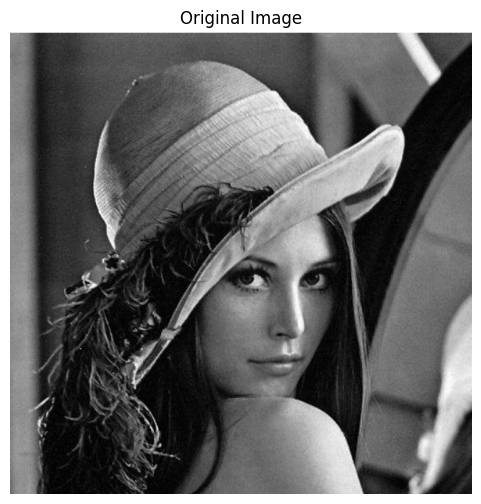

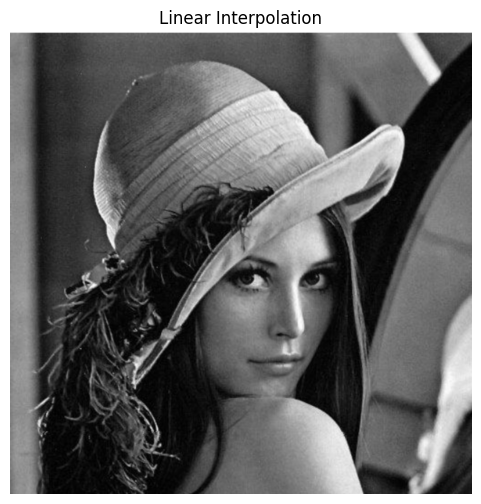

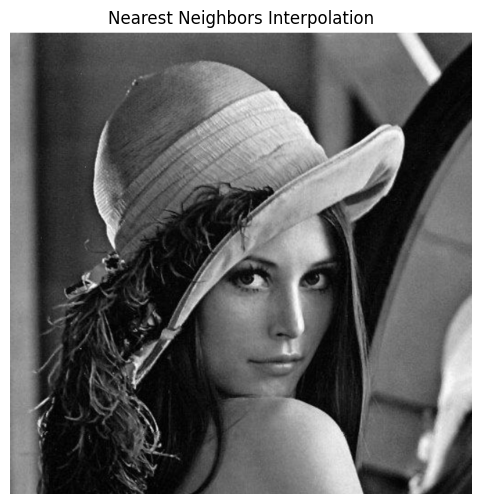

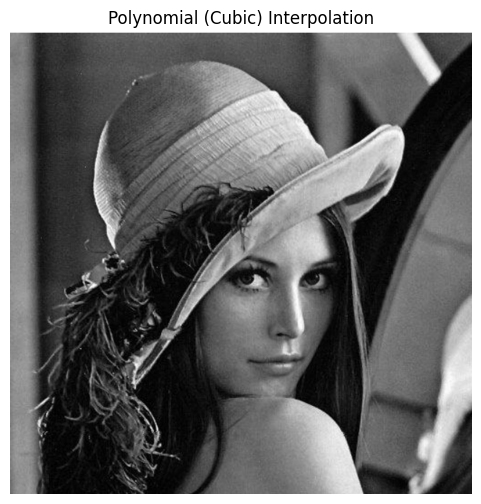

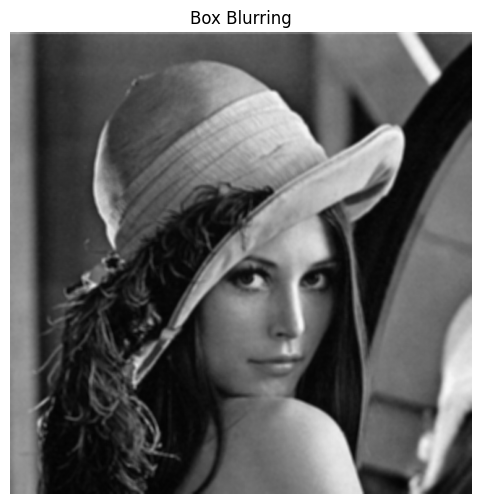

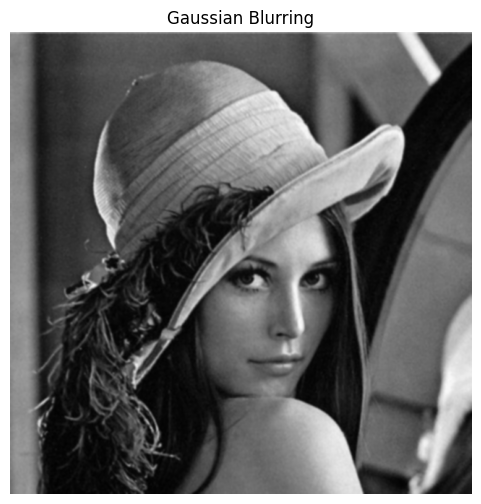

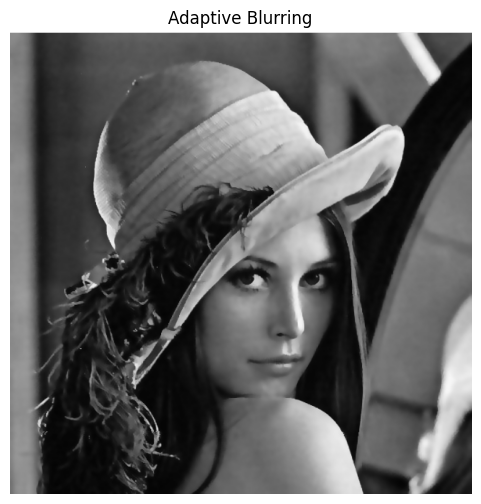

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def display_image(image, title="Image"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the input image
image_path = "/content/Screenshot_21-1-2025_114049_.jpeg"  # Replace with your image path
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found.")
else:
    display_image(image, title="Original Image")

# 1.1 Image Resizing
# Original dimensions
height, width = image.shape[:2]

# 1.1.1 Linear Interpolation
linear_resized = cv2.resize(image, (width * 2, height * 2), interpolation=cv2.INTER_LINEAR)
display_image(linear_resized, title="Linear Interpolation")

# 1.1.2 Nearest Neighbors Interpolation
nearest_resized = cv2.resize(image, (width * 2, height * 2), interpolation=cv2.INTER_NEAREST)
display_image(nearest_resized, title="Nearest Neighbors Interpolation")

# 1.1.3 Polynomial (Cubic) Interpolation
polynomial_resized = cv2.resize(image, (width * 2, height * 2), interpolation=cv2.INTER_CUBIC)
display_image(polynomial_resized, title="Polynomial (Cubic) Interpolation")

# 1.2 Image Blurring
# 1.2.1 Box Blurring
box_blurred = cv2.blur(image, (5, 5))
display_image(box_blurred, title="Box Blurring")

# 1.2.2 Gaussian Blurring
gaussian_blurred = cv2.GaussianBlur(image, (5, 5), 0)
display_image(gaussian_blurred, title="Gaussian Blurring")

# 1.2.3 Adaptive Blurring (using Bilateral Filter)
adaptive_blurred = cv2.bilateralFilter(image, 9, 75, 75)
display_image(adaptive_blurred, title="Adaptive Blurring")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

# Step 1: Load MNIST Dataset
data = fetch_openml('mnist_784', version=1)
X = data.data
y = data.target.astype(int)

# Step 2: Split into Train-Test Sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the Machine Learning Model
model = LogisticRegression(max_iter=200, solver='lbfgs', multi_class='multinomial')

# Step 4: Train the model on the training set
model.fit(X_train, y_train)

# Step 5: Evaluate on the Test Set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (80-20 Split): {accuracy:.2f}")

# Step 6: Apply K-Fold Cross-Validation
from sklearn.model_selection import KFold
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X, y, cv=kf)

print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Accuracy: {cross_val_scores.mean():.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy (80-20 Split): 0.92


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul

Cross-Validation Scores: [0.91842857 0.91942857 0.91842857 0.91728571 0.91835714]
Mean Cross-Validation Accuracy: 0.92


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import kagglehub
# Step 1: Load MNIST Dataset
path = kagglehub.dataset_download("hojjatk/mnist-dataset")
print("Path to dataset files:", path)

# Assuming the dataset file is named 'mnist.csv' inside the downloaded folder
dataset_path = f"{path}/mnist.csv"  # Adjust the file name as per the actual dataset
data = pd.read_csv(dataset_path)

# Extract features (X) and labels (y)
X = data.iloc[:, :-1].values  # All columns except the last one as features
y = data.iloc[:, -1].values   # Last column as labels


# Step 2: Split into Train-Test Sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the Machine Learning Models
# Model 1: Naive Bayes
model_nb = GaussianNB()
# Model 2: Support Vector Machine (SVM)
model_svm = SVC(kernel='linear', probability=True, random_state=42)

# Step 4: Train the models on the training set
model_nb.fit(X_train, y_train)
model_svm.fit(X_train, y_train)

# Step 5: Evaluate on the Test Set
# Naive Bayes
y_pred_nb = model_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# SVM
y_pred_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Print Metrics
print("Naive Bayes Metrics:")
print(f"Accuracy: {accuracy_nb:.2f}")
print(f"Precision: {precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")
print(f"F1-Measure: {f1_nb:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_nb}")

print("\nSVM Metrics:")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1-Measure: {f1_svm:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_svm}")

# Step 6: ROC and AUC
# Binarize the labels for ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Naive Bayes ROC and AUC
probs_nb = model_nb.predict_proba(X_test)
fpr_nb, tpr_nb, _ = roc_curve(y_test_bin.ravel(), probs_nb.ravel())
roc_auc_nb = auc(fpr_nb, tpr_nb)

# SVM ROC and AUC
probs_svm = model_svm.predict_proba(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test_bin.ravel(), probs_svm.ravel())
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC Curves
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='blue', label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Path to dataset files: /root/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1


FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1/mnist.csv'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import kagglehub
# Step 1: Load MNIST Dataset
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)
# The path variable already contains the path string.
# Use it directly to load your data using pandas or a similar library.
X = pd.read_csv(path) # Assuming your data is in a CSV file. Adjust accordingly if it's in a different format.
# If the dataset is in a compressed format like zip or tar.gz, you'll need to extract it first.
#import zipfile
#with zipfile.ZipFile(path, 'r') as zip_ref:
#    zip_ref.extractall('/content/mnist_data')  # Choose an appropriate extraction directory
#X = pd.read_csv('/content/mnist_data/your_data_file.csv') # Example with a CSV inside a zip
y = data.target.astype(int)

# Step 2: Split into Train-Test Sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the Machine Learning Models
# Model 1: Naive Bayes
model_nb = GaussianNB()
# Model 2: Support Vector Machine (SVM)
model_svm = SVC(kernel='linear', probability=True, random_state=42)

# Step 4: Train the models on the training set
model_nb.fit(X_train, y_train)
model_svm.fit(X_train, y_train)

# Step 5: Evaluate on the Test Set
# Naive Bayes
y_pred_nb = model_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# SVM
y_pred_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Print Metrics
print("Naive Bayes Metrics:")
print(f"Accuracy: {accuracy_nb:.2f}")
print(f"Precision: {precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")
print(f"F1-Measure: {f1_nb:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_nb}")

print("\nSVM Metrics:")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1-Measure: {f1_svm:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_svm}")

# Step 6: ROC and AUC
# Binarize the labels for ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Naive Bayes ROC and AUC
probs_nb = model_nb.predict_proba(X_test)
fpr_nb, tpr_nb, _ = roc_curve(y_test_bin.ravel(), probs_nb.ravel())
roc_auc_nb = auc(fpr_nb, tpr_nb)

# SVM ROC and AUC
probs_svm = model_svm.predict_proba(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test_bin.ravel(), probs_svm.ravel())
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC Curves
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='blue', label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Path to dataset files: /root/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1


IsADirectoryError: [Errno 21] Is a directory: '/root/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1'